# 📚 <span style='color:#0D2BA5'>**Réalisez un dashboard et assurez une veille technique**</span>

# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'> 1.Importer les librairies nécessaires </a>
******    
### <a href="#C2"><font color='DodgerBlue'>2. Visualisation des données </a>
******    
### <a href="#C3"><font color='DodgerBlue'>3. Pré-traitement des images </a>
******
### <a href="#C4"><font color='DodgerBlue'>4. Afficher des échantillons d'images par catégorie </a>
******
### <a href="#C5"><font color='DodgerBlue'>5. Approche par Dataset avec data augmentation intégrée au modèle VGG16 </a>
   - <a href="#C6"><font color='RoyalBlue'>**5.1 Préparation des Images et du Dataset**</a>
   - <a href="#C7"><font color='RoyalBlue'>**5.2 création du modèle**</a>
   - <a href="#C8"><font color='RoyalBlue'>**5.3 Scores**</a>
   - <a href="#C9"><font color='RoyalBlue'>**5.4 Visualisations**</a>
  ******
### <a href="#C10"><font color='DodgerBlue'>6. Classification Efficient Net</a>
******
   - <a href="#C11"><font color='RoyalBlue'>**6.1 Préparation du Dataset**</a>
   - <a href="#C12"><font color='RoyalBlue'>**6.2 création du modele**</a>
   - <a href="#C13"><font color='RoyalBlue'>**6.3 Scores**</a>
   - <a href="#C14"><font color='RoyalBlue'>**6.4 Visualisations**</a>
******
### <a href="#C15"><font color='DodgerBlue'>7. Features importance</a>
******
   - <a href="#C16"><font color='RoyalBlue'>**7.1 Comparaison des deux approches**</a>
*****

<span style='background:PowderBlue'>**Approche choisie :**

- ***Pour cette mission, nous reprendrons le projet précédent intitulé "Classification automatique des biens de consommation". L'approche que nous utiliserons sera basée sur EfficientNet, une architecture de réseau de neurones optimisée pour être plus efficace et performante.***
- ***EfficientNet ajuste automatiquement la taille du modèle en fonction des ressources disponibles, permettant ainsi d'obtenir d'excellents résultats tout en réduisant la complexité et le temps d'entraînement. Cette approche sera comparée à celle utilisée dans le projet 6, qui reposait sur un dataset avec une augmentation de données intégrée au modèle.***

# <a name="C1"><font color='RoyalBlue'> 1.Importer les librairies nécessaires </a>

In [4]:
import os
import shutil

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.applications import VGG16
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
import time
import shap

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")#style Seaborn par defaut

# <a name="C2"><font color='RoyalBlue'> 2. Visualisation des données </a>

In [7]:
# Chargement du jeu de données
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df_category = pd.read_csv('df_category.csv')
df_category

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,category_5,Cluster_cat,lemmatizer_cat,stemmed_cat,tokenize_cat,lemmatizer_name,tokenize_name,tokenize,tokenize_text,word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,NaN,4,feature elegance polyester multicolor eyelet d...,key featur eleg polyest multicolor abstract ey...,feature elegance polyester multicolor eyelet d...,elegance polyester multicolor eyelet door curtain,elegance polyester multicolor eyelet door curtain,"['key', 'features', 'elegance', 'polyester', '...",elegance polyester multicolor eyelet door curt...,162
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,NaN,0,specification cotton bath towel bath towel red...,specif sathiya cotton bath towel bath towel re...,specification cotton bath towel bath towel red...,cotton bath towel,cotton bath towel,"['specifications', 'sathiyas', 'cotton', 'bath...",cotton bath towel specification cotton bath to...,68
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,NaN,0,feature cotton terry face towel set size heigh...,key featur eurospa cotton terri face towel set...,feature cotton terry face towel set size heigh...,cotton terry face towel set,cotton terry face towel set,"['key', 'features', 'eurospa', 'cotton', 'terr...",cotton terry face towel set feature cotton ter...,169
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,NaN,4,feature fashion cotton print king size bedshee...,key featur santosh royal fashion cotton print ...,feature fashion cotton print king size bedshee...,fashion cotton print king size bedsheet,fashion cotton print king size bedsheet,"['key', 'features', 'santosh', 'royal', 'fashi...",fashion cotton print king size bedsheet featur...,133
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,NaN,4,feature jaipur print cotton king size bedsheet...,key featur jaipur print cotton floral king siz...,feature jaipur print cotton king size bedsheet...,jaipur print cotton king size bedsheet,jaipur print cotton king size bedsheet,"['key', 'features', 'jaipur', 'print', 'cotton...",jaipur print cotton king size bedsheet feature...,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43+00:00,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,NaN,0,oren empower self sticker pack price sticker u...,oren empow extra larg self adhes sticker pack ...,oren empower self sticker pack price sticker u...,oren empower self sticker,oren empower self sticker,"['oren', 'empower', 'extra', 'large', 'self', ...",oren empower self stic

In [8]:
# Ajout variable image_loc
path = "./image/"
df_category['image_loc'] = [os.path.join(path, row) for row in df_category['image']]
df_category['image_loc']

0       ./image/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       ./image/7b72c92c2f6c40268628ec5f14c6d590.jpg
2       ./image/64d5d4a258243731dc7bbb1eef49ad74.jpg
3       ./image/d4684dcdc759dd9cdf41504698d737d8.jpg
4       ./image/6325b6870c54cd47be6ebfbffa620ec7.jpg
                            ...                     
1045    ./image/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    ./image/fd6cbcc22efb6b761bd564c28928483c.jpg
1047    ./image/5912e037d12774bb73a2048f35a00009.jpg
1048    ./image/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    ./image/f2f027ad6a6df617c9f125173da71e44.jpg
Name: image_loc, Length: 1050, dtype: object

In [9]:
df_img = df_category.copy()
df_img= df_img[['image', 'image_loc', 'main_category']]
df_img.head(3)

,image,image_loc,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,./image/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,./image/7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,./image/64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care


In [10]:
df_image_par_cat = df_img.groupby('main_category').agg({'image' : 'count'})
df_image_par_cat

,image
main_category,
Baby Care,150
Beauty and Personal Care,150
Computers,150
Home Decor Festive Needs,150
Home Furnishing,150
Kitchen Dining,150
Watches,150


Home Furnishing


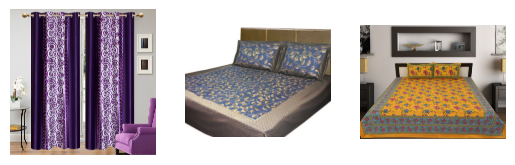

Baby Care


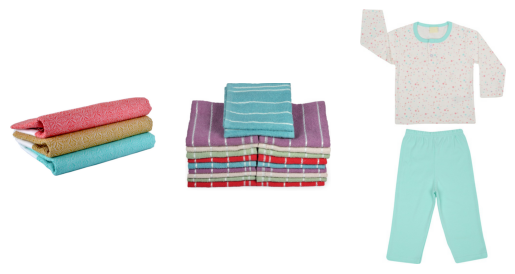

Watches


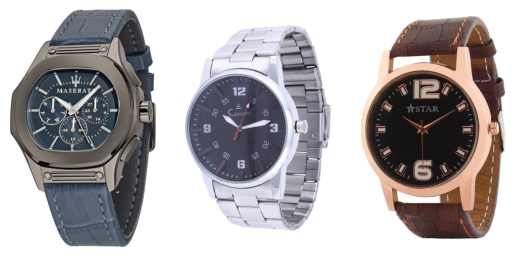

Home Decor  Festive Needs


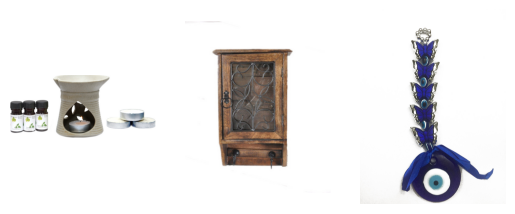

Kitchen  Dining


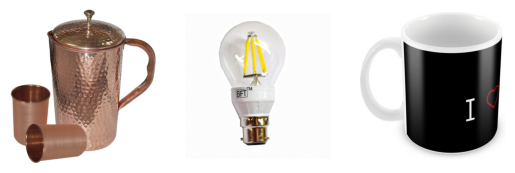

Beauty and Personal Care


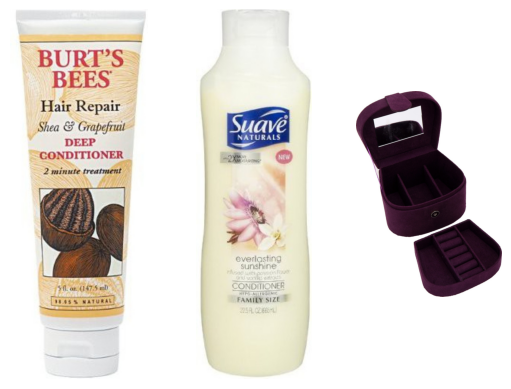

Computers


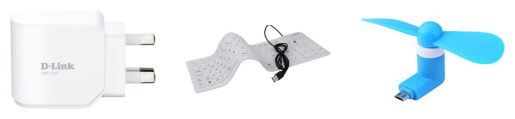

In [11]:
# Affichage des images 

for j, categ in enumerate(df_img["main_category"].unique()):
    bolded_string = "\033[1m" + categ + "\033[0m"
    print(bolded_string)
    for i in range(3):
        name_image = df_img[df_img["main_category"] == categ]["image"].iloc[i]
        filename = path + name_image
        plt.subplot(130 + 1 + i)
        if os.path.exists(filename):
            img = imread(filename)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"Image {filename} not found, skipping.")
    plt.show()

# <a name="C3"><font color='RoyalBlue'> 3. Pré-traitement des images </a>

In [13]:
# Chemins des répertoires
train_dir = 'Datacat/train/'
test_dir = 'Datacat/test/'

def collect_images_and_labels(directory):
    image_paths = []
    labels = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for image in os.listdir(category_path):
                image_paths.append(os.path.join(category_path, image))
                labels.append(category)
    return image_paths, labels

# Collecter les images et leurs étiquettes des répertoires d'entraînement et de test
train_image_paths, train_labels = collect_images_and_labels(train_dir)
test_image_paths, test_labels = collect_images_and_labels(test_dir)

# Créer des DataFrame pour l'entraînement et le test
train_data = pd.DataFrame({'image_path': train_image_paths, 'label_name': train_labels})
test_data = pd.DataFrame({'image_path': test_image_paths, 'label_name': test_labels})

# Encoder les étiquettes
le = preprocessing.LabelEncoder()
train_data["label"] = le.fit_transform(train_data["label_name"])
test_data["label"] = le.transform(test_data["label_name"])

# Afficher les premières lignes des DataFrame
train_data.sample(10)

,image_path,label_name,label
676,Datacat/train/Kitchen Dining\Kitchen Dining_...,Kitchen Dining,5
493,Datacat/train/Home Decor Festive Needs\Home D...,Home Decor Festive Needs,3
203,Datacat/train/Beauty and Personal Care\Beauty ...,Beauty and Personal Care,1
609,Datacat/train/Home Furnishing\Home Furnishing_...,Home Furnishing,4
187,Datacat/train/Beauty and Personal Care\Beauty ...,Beauty and Personal Care,1
489,Datacat/train/Home Decor Festive Needs\Home D...,Home Decor Festive Needs,3
756,Datacat/train/Kitchen Dining\Kitchen Dining_...,Kitchen Dining,5
479,Datacat/train/Home Decor Festive Needs\Home D...,Home Decor Festive Needs,3
505,Datacat/train/Home Decor Festive Needs\Home D...,Home Decor Festive Needs,3
451,Datacat/train/Home Decor Festive Needs\Home D...,Home Decor Festive Needs,3


In [14]:
def remove_duplicates(directory):
    classes = os.listdir(directory)
    normalized_classes = {}

    for class_name in classes:
        # Normaliser le nom de la classe (remplacer les espaces par des underscores)
        normalized_class_name = class_name.replace(" ", "_")
        
        # Si la classe normalisée existe déjà, fusionner les fichiers
        if normalized_class_name in normalized_classes:
            original_class_path = os.path.join(directory, class_name)
            target_class_path = os.path.join(directory, normalized_classes[normalized_class_name])
            
            # Déplacer tous les fichiers de la classe en doublon vers la classe unique
            for file_name in os.listdir(original_class_path):
                shutil.move(os.path.join(original_class_path, file_name), target_class_path)
            
            # Supprimer le répertoire en doublon après avoir déplacé les fichiers
            shutil.rmtree(original_class_path)
        else:
            # Ajouter la classe normalisée à la liste
            normalized_classes[normalized_class_name] = class_name

# Supprimer les doublons dans les répertoires d'entraînement et de test
remove_duplicates('Datacat/train')
remove_duplicates('Datacat/test')

# Afficher les classes après suppression des doublons
train_classes = os.listdir('Datacat/train')
test_classes = os.listdir('Datacat/test')

print("Classes d'entraînement après suppression des doublons :", train_classes)
print("Classes de test après suppression des doublons :", test_classes)
print("Nombre de classes d'entraînement :", len(train_classes))
print("Nombre de classes de test :", len(test_classes))

Classes d'entraînement après suppression des doublons : ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor  Festive Needs', 'Home Furnishing', 'Kitchen  Dining', 'Watches']
Classes de test après suppression des doublons : ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor  Festive Needs', 'Home Furnishing', 'Kitchen  Dining', 'Watches']
Nombre de classes d'entraînement : 7
Nombre de classes de test : 7


In [15]:
test_data.sample(5)

,image_path,label_name,label
43,Datacat/test/Computers\Computers_43.jpg,Computers,2
70,Datacat/test/Home Furnishing\Home Furnishing_7...,Home Furnishing,4
23,Datacat/test/Beauty and Personal Care\Beauty a...,Beauty and Personal Care,1
103,Datacat/test/Watches\Watches_98.jpg,Watches,6
32,Datacat/test/Computers\Computers_32.jpg,Computers,2


In [16]:
train_data.groupby("label_name").count()

,image_path,label
label_name,,
Baby Care,135,135
Beauty and Personal Care,135,135
Computers,135,135
Home Decor Festive Needs,135,135
Home Furnishing,136,136
Kitchen Dining,135,135
Watches,135,135


### <a name="C4"><font color='DodgerBlue'> 4. Afficher des échantillons d'images par catégorie </a>

Baby Care


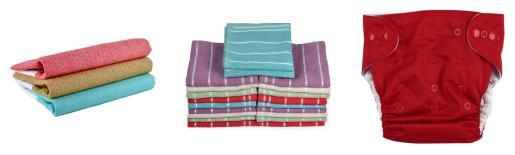

Beauty and Personal Care


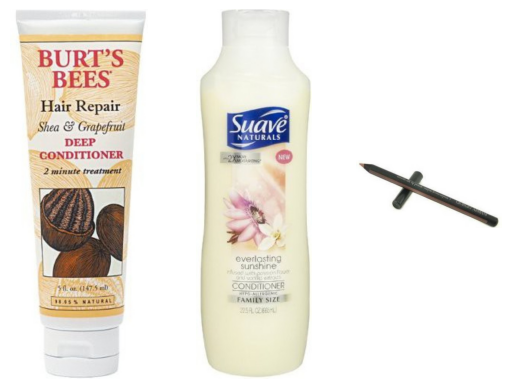

Computers


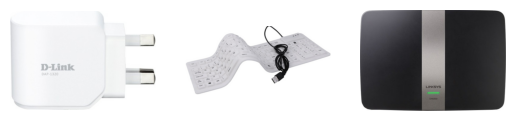

Home Decor  Festive Needs


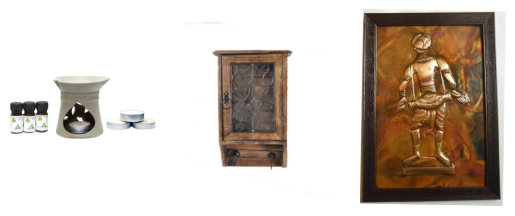

Home Furnishing


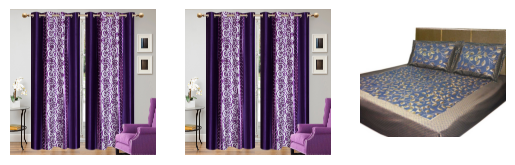

Kitchen  Dining


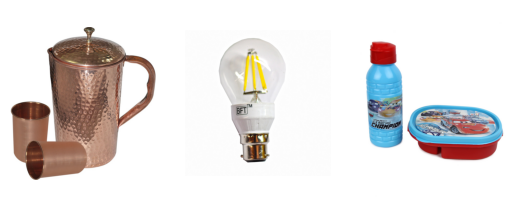

Watches


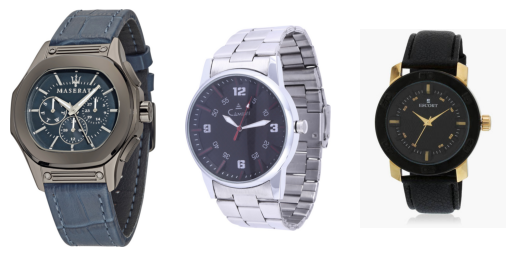

In [18]:
# Fonction pour lister les images par catégorie
def list_fct(name, data):
    return [data["image_path"][i] for i in range(len(data)) if data["label_name"][i] == name]

# Catégories
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor  Festive Needs", "Home Furnishing", "Kitchen  Dining", "Watches"]

# Afficher quelques images de chaque catégorie
for name in list_labels:
    print(name)
    image_paths = list_fct(name, train_data) 
    for i in range(min(3, len(image_paths))):  # Affiche jusqu'à 3 images de la catégorie
        plt.subplot(130 + 1 + i)
        image = imread(image_paths[i])
        plt.imshow(image)
        plt.axis('off')  # Pour masquer les axes
    plt.show()

# <a name="C5"><font color='RoyalBlue'> 5. Approche par Dataset avec data augmentation intégrée au modèle VGG16 </a>

L'approche par dataset avec "data augmentation" intégrée au modèle dans le cadre de VGG16 consiste à augmenter artificiellement la quantité de données d'entraînement pour améliorer les performances du modèle. Voici une explication simple des termes et concepts importants :
*****
**VGG16 :** C'est un réseau de neurones profond conçu pour la reconnaissance d'images. Il est constitué de 16 couches (d'où son nom) et est connu pour sa simplicité et sa performance dans les tâches de classification d'images.
*****
**Dataset :** Dans le cas d'un modèle de classification d'images, ce dataset est constitué d'images et des étiquettes (ou catégories) correspondantes.
*****
**Data Augmentation :** C'est une technique qui permet de créer artificiellement plus d'exemples d'entraînement à partir des données existantes. Cela se fait en appliquant des transformations sur les images, telles que :

- Rotation
- Redimensionnement
- Recadrage
- Changement de luminosité
- Flip (miroir horizontal ou vertical)
*****  
**L'objectif est de rendre le modèle plus robuste en le formant sur un plus grand nombre de variations d'images.**

**Intégrée au modèle :** Cela signifie que la génération des nouvelles images augmentées (avec les transformations) se fait pendant l'entraînement du modèle, et non pas manuellement avant.
*****
Pourquoi c'est utile ?
Cela permet de mieux généraliser sur des images qu'il n'a jamais vues, car le modèle apprend à reconnaître les objets dans différentes conditions (orientation, éclairage, etc.).
Cela réduit le risque de surapprentissage (ou overfitting) : le modèle ne mémorise pas simplement les images du dataset, mais apprend vraiment à reconnaître les objets.
*****
En résumé, l'approche par dataset avec data augmentation intégrée dans VGG16 permet d'améliorer la qualité et la diversité des données d'entraînement, rendant le modèle plus performant et plus capable de généraliser à de nouvelles images.

### <a name="C6"><span style='background:PowderBlue'> 5.1 Préparation des Images et du Dataset </a>

In [22]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [23]:
train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

Found 946 files belonging to 7 classes.
Using 710 files for training.
Found 946 files belonging to 7 classes.
Using 236 files for validation.
Found 105 files belonging to 7 classes.


In [24]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

### <a name="C7"><span style='background:PowderBlue'> 5.2 création du modèle </a>

In [26]:
batch_size = 32
IMG_SIZE = 224

def dataset_fct(path, validation_split=0, data_type=None):
    dataset = tf.keras.utils.image_dataset_from_directory(
        path, labels='inferred', label_mode='categorical',
        class_names=None, batch_size=batch_size, image_size=(IMG_SIZE, IMG_SIZE), shuffle=True, seed=42,
        validation_split=validation_split, subset=data_type
    )
    return dataset

train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

# Déterminer le nombre de classes
num_classes = dataset_train.element_spec[1].shape[1]
print(f"Nombre de classes : {num_classes}")

def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

# Appliquer le prétraitement aux datasets
dataset_train = dataset_train.map(resize_and_rescale)
dataset_val = dataset_val.map(resize_and_rescale)
dataset_test = dataset_test.map(resize_and_rescale)

def create_VGG16_fct2(num_classes):
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Utiliser num_classes ici

    model = Model(inputs=input_tensor, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_VGG16_fct2(num_classes)

# Création du callback
model3_save_path = "./model3_best_weights.keras"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Afficher le résumé du modèle
model3.summary()

# Entraîner le modèle
history = model3.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=50,  # Ajustez selon vos besoins
    callbacks=callbacks_list
)

Found 946 files belonging to 7 classes.
Using 710 files for training.
Found 946 files belonging to 7 classes.
Using 236 files for validation.
Found 105 files belonging to 7 classes.
Nombre de classes : 7


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1896 - loss: 2.0354
Epoch 1: val_loss improved from inf to 1.42944, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.1930 - loss: 2.0288 - val_accuracy: 0.6398 - val_loss: 1.4294
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5414 - loss: 1.4322
Epoch 2: val_loss improved from 1.42944 to 1.08250, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.5422 - loss: 1.4285 - val_accuracy: 0.7246 - val_loss: 1.0825
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6214 - loss: 1.1822
Epoch 3: val_loss improved from 1.08250 to 0.91584, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.6224 - loss: 1.1801 - val_accuracy: 0.7627 - val_loss: 0.9158
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6754 - loss: 0.9929
Epoch 4: val_loss improved from 0.91584

### <a name="C8"><span style='background:PowderBlue'> 5.3 Scores </a>

In [28]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9791 - loss: 0.1371
Training Accuracy   : 0.9718

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8630 - loss: 0.5238
Validation Accuracy :  0.8475


In [29]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8347
Test Accuracy       :  0.5619


### <a name="C9"><span style='background:PowderBlue'> 5.4 Visualisations </a>

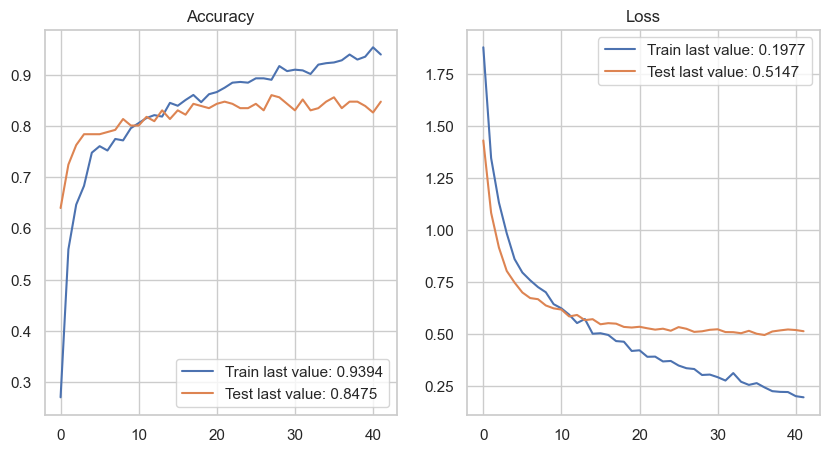

In [30]:
# Fonction pour afficher l'historique d'entraînement sans annotations
def show_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(10, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label=f'Train last value: {acc[-1]:.4f}')
    plt.plot(epochs_range, val_acc, label=f'Test last value: {val_acc[-1]:.4f}')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label=f'Train last value: {loss[-1]:.4f}')
    plt.plot(epochs_range, val_loss, label=f'Test last value: {val_loss[-1]:.4f}')
    plt.legend(loc='upper right')
    plt.title('Loss')
    
    plt.show()

# Fonction pour sauvegarder l'historique d'entraînement sans annotations
def plot_history(history, path="history.png"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(10, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label=f'Train last value: {acc[-1]:.4f}')
    plt.plot(epochs_range, val_acc, label=f'Test last value: {val_acc[-1]:.4f}')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label=f'Train last value: {loss[-1]:.4f}')
    plt.plot(epochs_range, val_loss, label=f'Test last value: {val_loss[-1]:.4f}')
    plt.legend(loc='upper right')
    plt.title('Loss')

    plt.savefig(path)
    plt.close()

# Utilisation des fonctions définies
show_history(history)
plot_history(history, path="standard.png")

- Les résultats sont corrects au regard du nombre d’images
- La data augmentation permet surtout d’éviter le sur-apprentissage

# <a name="C10"><font color='RoyalBlue'> 6. Classification Efficient Net </a>

### <a name="C11"><span style='background:PowderBlue'> 6.1 Préparation du Dataset </a>

In [33]:
train_classes = os.listdir('Datacat/train')
test_classes = os.listdir('Datacat/test')

print("Classes d'entraînement :", train_classes)
print("Classes de test :", test_classes)
print("Nombre de classes d'entraînement :", len(train_classes))
print("Nombre de classes de test :", len(test_classes))

Classes d'entraînement : ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor  Festive Needs', 'Home Furnishing', 'Kitchen  Dining', 'Watches']
Classes de test : ['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor  Festive Needs', 'Home Furnishing', 'Kitchen  Dining', 'Watches']
Nombre de classes d'entraînement : 7
Nombre de classes de test : 7


In [34]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

Found 946 files belonging to 7 classes.
Using 710 files for training.
Found 946 files belonging to 7 classes.
Using 236 files for validation.
Found 105 files belonging to 7 classes.


***On définit la fonction de création du modèle Efficient Net :***

In [36]:
def create_EfficientNet_model(num_classes):
    # Charger le modèle EfficientNet pré-entraîné sans les couches supérieures
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Rendre les couches du modèle pré-entraîné non entraînables
    for layer in base_model.layers:
        layer.trainable = False

    # Ajouter des couches personnalisées
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)  # Remplacez num_classes par le nombre de classes

    # Créer le nouveau modèle
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

### <a name="C12"><span style='background:PowderBlue'> 6.2 création du modele </a>

In [38]:
# Création du modèle EfficientNet
model_efficientnet = create_EfficientNet_model(num_classes=7)  

# Création du callback
model_efficientnet_save_path = "./model_efficientnet_best_weights.keras" 
checkpoint = ModelCheckpoint(model_efficientnet_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 64,755,102 (247.02 MB)

 Trainable params: 657,415 (2.51 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

None


In [39]:
# Entraînement du modèle
history_efficientnet = model_efficientnet.fit(dataset_train,
                                              validation_data=dataset_val,
                                              batch_size=batch_size,
                                              epochs=50,
                                              callbacks=callbacks_list,
                                              verbose=1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6846 - loss: 1.0426
Epoch 1: val_loss improved from inf to 0.43594, saving model to ./model_efficientnet_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.6891 - loss: 1.0295 - val_accuracy: 0.8305 - val_loss: 0.4359
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9111 - loss: 0.2933
Epoch 2: val_loss did not improve from 0.43594
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9114 - loss: 0.2925 - val_accuracy: 0.8475 - val_loss: 0.4707
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9521 - loss: 0.1714
Epoch 3: val_loss improved from 0.43594 to 0.39506, saving model to ./model_efficientnet_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9517 - loss: 0.1724 - val_accuracy: 0.8602 - val_loss: 0.3951
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9696 - loss: 0.1294
Epoch 4: val_loss improved from 0.39506 to 0.35709, saving model

### <a name="C13"><span style='background:PowderBlue'>6.3 Scores </a>

In [41]:
# Score du dernier epoch
loss, accuracy = model_efficientnet.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model_efficientnet.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9953 - loss: 0.0140
Training Accuracy   : 0.9958

8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8495 - loss: 0.3755
Validation Accuracy :  0.8559


In [42]:
# Score de l'epoch optimal

model_efficientnet.load_weights(model_efficientnet_save_path)

loss, accuracy = model_efficientnet.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model_efficientnet.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8644
Test Accuracy       :  0.7238


### <a name="C14"><span style='background:PowderBlue'> 6.4 Visualisations </a>

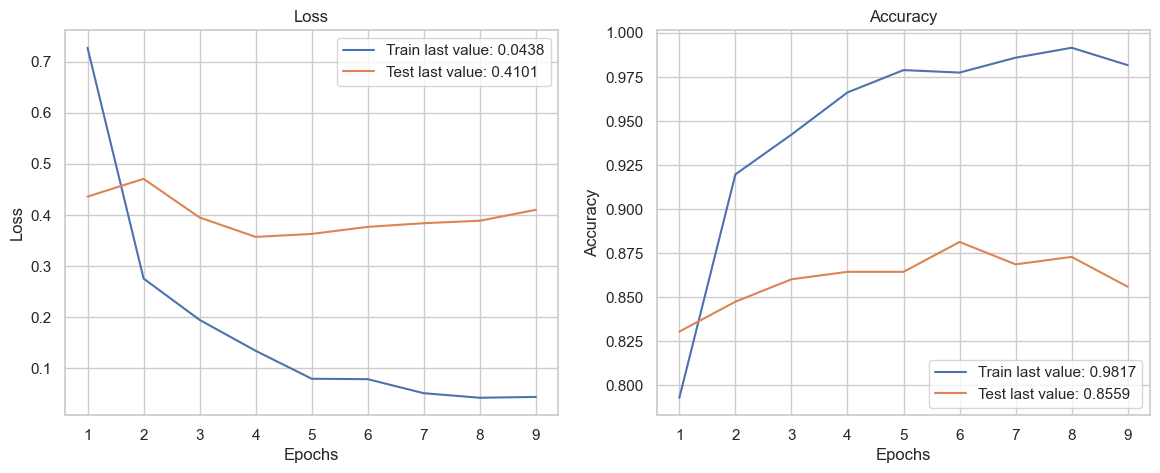

In [43]:
# Fonction pour tracer l'historique d'entraînement
def plot_history(history, path):
    # Accéder à l'historique à partir de l'objet `History`
    history = history.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    if 'loss' in history:
        plt.plot(epochs, history['loss'], label=f'Train last value: {history["loss"][-1]:.4f}')
    if 'val_loss' in history:
        plt.plot(epochs, history['val_loss'], label=f'Test last value: {history["val_loss"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    if 'accuracy' in history:
        plt.plot(epochs, history['accuracy'], label=f'Train last value: {history["accuracy"][-1]:.4f}')
    if 'val_accuracy' in history:
        plt.plot(epochs, history['val_accuracy'], label=f'Test last value: {history["val_accuracy"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Sauvegarder l'image dans le fichier spécifié
    plt.savefig(path)
    plt.show()

# Utilisation du tracé
plot_history(history_efficientnet, path="history_efficientnet.png")
plt.close()

- ***Le modèle s'entraîne très bien, avec une précision de 98%, mais sur les données de test (nouvelles données), il est moins performant avec une précision de 88%. La différence entre l'entraînement et le test peut indiquer que le modèle fonctionne mieux sur ce qu'il connaît mais moins bien sur des données nouvelles.***
- ***le loss d'entraînement diminue rapidement, ce qui signifie que le modèle apprend bien sur les données d'entraînement.
Par contre, le loss de test reste assez stable, ce qui indique que le modèle a plus de mal à généraliser sur de nouvelles données.***

# <a name="C15"><font color='RoyalBlue'> 7. Features importance </a>

In [46]:
# Charger les meilleurs poids du modèle
model_efficientnet.load_weights(model_efficientnet_save_path)

# Évaluer l'accuracy sur les ensembles de validation et de test
loss_val, accuracy_val = model_efficientnet.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy_val))

loss_test, accuracy_test = model_efficientnet.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy_test))

# Obtenir les probabilités de prédiction pour l'ensemble de test
scores_test = model_efficientnet.predict(dataset_test)

# Liste des classes (les différentes catégories de votre dataset)
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor  Festive Needs", 
               "Home Furnishing", "Kitchen  Dining", "Watches"]

# Calculer les scores moyens par classe sans les vraies étiquettes
class_scores_test = []
for i in range(len(list_labels)):
    # Extraire les scores pour la classe i
    class_scores = scores_test[:, i]
    
    # Calculer le score moyen pour la classe i
    class_scores_test.append(np.mean(class_scores))

# Afficher le score moyen pour chaque classe
for i, class_name in enumerate(list_labels):
    print(f"Classe : {class_name}, Score moyen : {class_scores_test[i]:.4f}")

Validation Accuracy :  0.8644
Test Accuracy       :  0.7238
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step
Classe : Baby Care, Score moyen : 0.0582
Classe : Beauty and Personal Care, Score moyen : 0.1644
Classe : Computers, Score moyen : 0.1347
Classe : Home Decor  Festive Needs, Score moyen : 0.2098
Classe : Home Furnishing, Score moyen : 0.1762
Classe : Kitchen  Dining, Score moyen : 0.1114
Classe : Watches, Score moyen : 0.1453


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 0/998 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 822ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 839ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 817ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 995ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


PartitionExplainer explainer: 2it [01:25, 85.11s/it]               


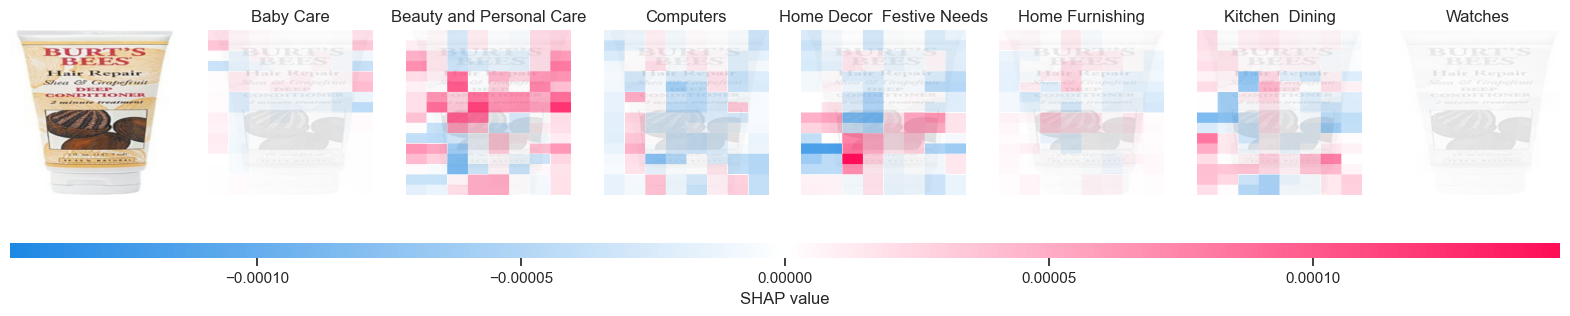

In [48]:
# Charger une image exemple depuis ton dataset
image_path = "C:/Users/samir/Datacat/train/Beauty and Personal Care/Beauty and Personal Care_135.jpg"
img = Image.open(image_path).resize((224, 224))
img_array = np.expand_dims(np.array(img), axis=0)  # Préparer l'image pour le modèle

# Fonction pour faire des prédictions avec le modèle EfficientNet
def f(X):
    return model_efficientnet.predict(X)

# Configuration du masker pour les images avec SHAP
masker = shap.maskers.Image("inpaint_telea", img_array.shape[1:])

# Création de l'explainer SHAP
explainer = shap.Explainer(f, masker, output_names=list_labels)

# Calcul des valeurs Shapley pour l'image donnée
shap_values = explainer(img_array, max_evals=1000, batch_size=50)

# Visualisation des valeurs Shapley (features importance)
shap.image_plot(shap_values)

- ***Heatmaps des valeurs Shapley :***
- Les carrés colorés sur chaque image représentent les contributions (ou l'importance) des différentes parties de l'image pour la prédiction du modèle.
- Les zones rouges indiquent les pixels qui ont augmenté la probabilité que l'image appartienne à la classe en question.
- Les zones bleues indiquent les pixels qui ont diminué la probabilité que l'image appartienne à la classe en question.
*****
- Les zones rouges (fortes probabilités) indiquent les features qui ont eu un impact positif important sur la prédiction du modèle, donc elles sont plus importantes pour cette classe.
- Les zones bleues, en revanche, montrent les features qui ont eu un impact négatif.

In [53]:
# Fonction pour tracer l'historique d'entraînement de deux modèles
def plot_history(history_vgg16, history_efficientnet):
    # Extraire les données d'accuracy et de loss pour les deux modèles
    acc_vgg16 = history_vgg16.history['accuracy']
    val_acc_vgg16 = history_vgg16.history['val_accuracy']
    loss_vgg16 = history_vgg16.history['loss']
    val_loss_vgg16 = history_vgg16.history['val_loss']
    
    acc_effnet = history_efficientnet.history['accuracy']
    val_acc_effnet = history_efficientnet.history['val_accuracy']
    loss_effnet = history_efficientnet.history['loss']
    val_loss_effnet = history_efficientnet.history['val_loss']

    epochs_range = range(1, len(acc_vgg16) + 1)

    # Tracé de l'accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc_vgg16, label='Train Accuracy VGG16')
    plt.plot(epochs_range, val_acc_vgg16, label='Validation Accuracy VGG16')
    plt.plot(epochs_range, acc_effnet, label='Train Accuracy EfficientNet')
    plt.plot(epochs_range, val_acc_effnet, label='Validation Accuracy EfficientNet')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Tracé du loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss_vgg16, label='Train Loss VGG16')
    plt.plot(epochs_range, val_loss_vgg16, label='Validation Loss VGG16')
    plt.plot(epochs_range, loss_effnet, label='Train Loss EfficientNet')
    plt.plot(epochs_range, val_loss_effnet, label='Validation Loss EfficientNet')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


### <a name="C16"><span style='background:PowderBlue'> 7.1 Comparaison des deux approches </a>

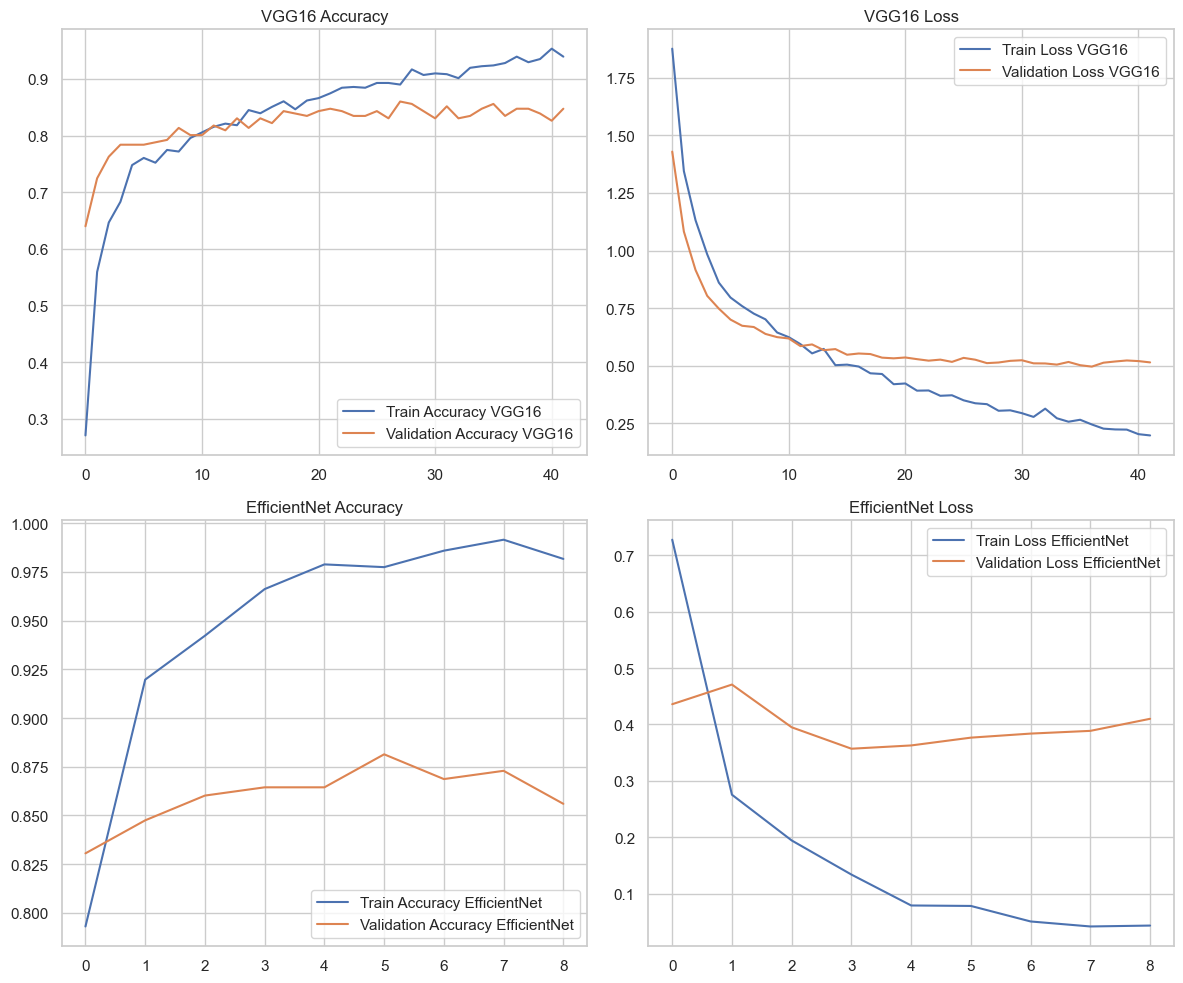

In [67]:
def plot_history(history_vgg16, history_efficientnet):
    # Récupérer les informations des deux historiques
    acc_vgg16 = history_vgg16.history['accuracy']
    val_acc_vgg16 = history_vgg16.history['val_accuracy']
    loss_vgg16 = history_vgg16.history['loss']
    val_loss_vgg16 = history_vgg16.history['val_loss']
    
    acc_effnet = history_efficientnet.history['accuracy']
    val_acc_effnet = history_efficientnet.history['val_accuracy']
    loss_effnet = history_efficientnet.history['loss']
    val_loss_effnet = history_efficientnet.history['val_loss']

    # Déterminer le nombre d'époques pour chaque modèle
    epochs_range_vgg16 = range(len(acc_vgg16))
    epochs_range_effnet = range(len(acc_effnet))

    plt.figure(figsize=(12, 10))

    # Tracer l'Accuracy pour VGG16
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range_vgg16, acc_vgg16, label='Train Accuracy VGG16')
    plt.plot(epochs_range_vgg16, val_acc_vgg16, label='Validation Accuracy VGG16')
    plt.legend(loc='lower right')
    plt.title('VGG16 Accuracy')

    # Tracer la Loss pour VGG16
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range_vgg16, loss_vgg16, label='Train Loss VGG16')
    plt.plot(epochs_range_vgg16, val_loss_vgg16, label='Validation Loss VGG16')
    plt.legend(loc='upper right')
    plt.title('VGG16 Loss')

    # Tracer l'Accuracy pour EfficientNet
    plt.subplot(2, 2, 3)
    plt.plot(epochs_range_effnet, acc_effnet, label='Train Accuracy EfficientNet')
    plt.plot(epochs_range_effnet, val_acc_effnet, label='Validation Accuracy EfficientNet')
    plt.legend(loc='lower right')
    plt.title('EfficientNet Accuracy')

    # Tracer la Loss pour EfficientNet
    plt.subplot(2, 2, 4)
    plt.plot(epochs_range_effnet, loss_effnet, label='Train Loss EfficientNet')
    plt.plot(epochs_range_effnet, val_loss_effnet, label='Validation Loss EfficientNet')
    plt.legend(loc='upper right')
    plt.title('EfficientNet Loss')

    plt.tight_layout()
    plt.show()

# Utilisation de la fonction avec vos historiques d'entraînement
plot_history(history, history_efficientnet)



- **Le modèle classique VGG16** montre une bonne performance en termes d'accuracy avec un bon écart entre l'entraînement et la validation.
- **EfficientNet** montre une meilleure généralisation avec une accuracy plus élevée sur le jeu de test que VGG16.
*****
- **Test :** La Loss sur le jeu de validation est d'environ 0.50 à la fin de l'entraînement, ce qui montre un certain overfitting (écart notable entre le jeu d'entraînement et de validation).
- **Test :** La Loss de validation est également inférieure à celle de VGG16 avec une valeur d'environ 0.41, ce qui indique que le modèle EfficientNet est plus robuste face au surapprentissage.

In [57]:
# Charger les poids du modèle EfficientNet
model_efficientnet.load_weights(model_efficientnet_save_path)

# Évaluer les modèles sur l'ensemble de test
loss_vgg16, acc_vgg16 = model3.evaluate(dataset_test)
loss_effnet, acc_effnet = model_efficientnet.evaluate(dataset_test)

print(f"Test Accuracy VGG16      : {acc_vgg16:.4f}")
print(f"Test Accuracy EfficientNet: {acc_effnet:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4977 - loss: 36.3787
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7208 - loss: 1.0441
Test Accuracy VGG16      : 0.5048
Test Accuracy EfficientNet: 0.7238


***EfficientNet : Avec une meilleure accuracy de validation et une Loss plus faible sur l'ensemble de test, EfficientNet surpasse clairement VGG16 en termes de généralisation et de robustesse. Cela montre qu'EfficientNet est plus capable d'apprendre efficacement à partir des données tout en réduisant le surapprentissage.***